In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

drive_path = "/content/drive/MyDrive"
print("Your Google Drive folders/files:")
print(os.listdir(drive_path))

Your Google Drive folders/files:
['tree_species.zip', 'Colab Notebooks']


In [8]:
import zipfile

zip_path = "/content/drive/MyDrive/tree_species.zip"
extract_path = "/content/tree_species"  # You can name this anything

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Contents after extraction:", os.listdir(extract_path))


Contents after extraction: ['Tree_Species_Dataset']


In [9]:
import os

repo_path = "/content/tree_species"  # Extracted folder path

class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")
print("Class names:", class_dirs)


Number of classes: 1
Class names: ['Tree_Species_Dataset']


In [11]:
import os

for root, dirs, files in os.walk("/content/tree_species"):
    print("Folder:", root)
    print("Subfolders:", dirs)
    print("Files:", files)
    break  # Only show top-level


Folder: /content/tree_species
Subfolders: ['Tree_Species_Dataset']
Files: []


In [13]:
import os
import pandas as pd

# Get class directories again
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}

# Convert to DataFrame
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])

# Show top classes and shape
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("Shape:", class_counts_df.shape)


           Image Count
other              150
neem                50
coconut             50
sonmahor            50
sugarcane           50
Shape: (31, 1)


In [16]:
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

class_counts = {}

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        count = sum(
            1 for f in os.listdir(class_folder)
            if f.lower().endswith(valid_extensions)
        )
        class_counts[class_name] = count

# Convert to DataFrame
import pandas as pd
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])

# Output
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("Shape:", class_counts_df.shape)
print("Total valid images:", class_counts_df['Image Count'].sum())


           Image Count
other              150
neem                50
coconut             50
sonmahor            50
sugarcane           50
Shape: (31, 1)
Total valid images: 1600


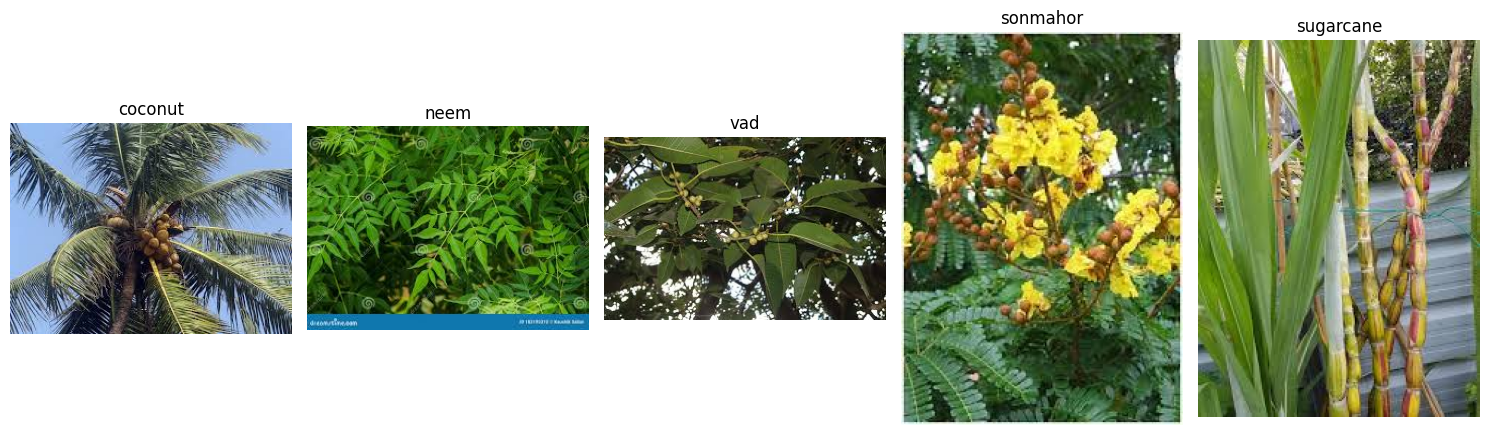

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Redefine class_dirs using valid class folders
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    shown = 0
    for class_dir in class_dirs:
        class_folder = os.path.join(repo_path, class_dir)
        # Get valid image files only
        image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if not image_files:
            continue  # skip if no valid images
        img_path = os.path.join(class_folder, image_files[0])
        img = Image.open(img_path)
        plt.subplot(1, n, shown + 1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
        shown += 1
        if shown == n:
            break
    plt.tight_layout()
    plt.show()

show_sample_images(repo_path, class_dirs)


In [18]:
from PIL import Image
import os
import pandas as pd

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(valid_extensions):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    image_shapes.append(img.size)
            except Exception as e:
                print(f"Skipping corrupted image: {img_path} | Error: {e}")

# Create DataFrame
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print(shapes_df.describe())
shapes_df.head()


             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


,Width,Height
0,259,194
1,275,183
2,225,225
3,259,194
4,290,174


In [19]:
import hashlib
from collections import defaultdict
import os

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(valid_extensions):
            img_path = os.path.join(class_path, img_file)
            try:
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)
            except Exception as e:
                print(f"Could not read file {img_path} — {e}")

# Find duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}

print("🔁 Duplicate image sets found:", len(duplicates))

# Optionally, print them
for i, dup_group in enumerate(duplicates.values(), 1):
    print(f"\nDuplicate Set {i}:")
    for path in dup_group:
        print("  ", path)


🔁 Duplicate image sets found: 82

Duplicate Set 1:
   /content/tree_species/Tree_Species_Dataset/coconut/download (1).jpg
   /content/tree_species/Tree_Species_Dataset/coconut/download (3).jpg

Duplicate Set 2:
   /content/tree_species/Tree_Species_Dataset/vad/download (4).jpeg
   /content/tree_species/Tree_Species_Dataset/vad/download (15).jpeg

Duplicate Set 3:
   /content/tree_species/Tree_Species_Dataset/sonmahor/download (6).jpeg
   /content/tree_species/Tree_Species_Dataset/sonmahor/download (19).jpeg

Duplicate Set 4:
   /content/tree_species/Tree_Species_Dataset/amla/images (7).jpeg
   /content/tree_species/Tree_Species_Dataset/amla/images (33).jpeg

Duplicate Set 5:
   /content/tree_species/Tree_Species_Dataset/amla/images (32).jpeg
   /content/tree_species/Tree_Species_Dataset/amla/images (27).jpeg

Duplicate Set 6:
   /content/tree_species/Tree_Species_Dataset/amla/images (31).jpeg
   /content/tree_species/Tree_Species_Dataset/amla/images.jpeg

Duplicate Set 7:
   /content/t

In [20]:
from PIL import Image
import os

corrupt_images = []
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        if not img_file.lower().endswith(valid_extensions):
            continue
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                img.verify()  # Verify integrity
        except Exception as e:
            corrupt_images.append(img_path)

print("🛑 Corrupted images found:", len(corrupt_images))

# Optional: print paths of corrupted images
for path in corrupt_images:
    print("  ", path)


🛑 Corrupted images found: 0


Duplicate set 1:


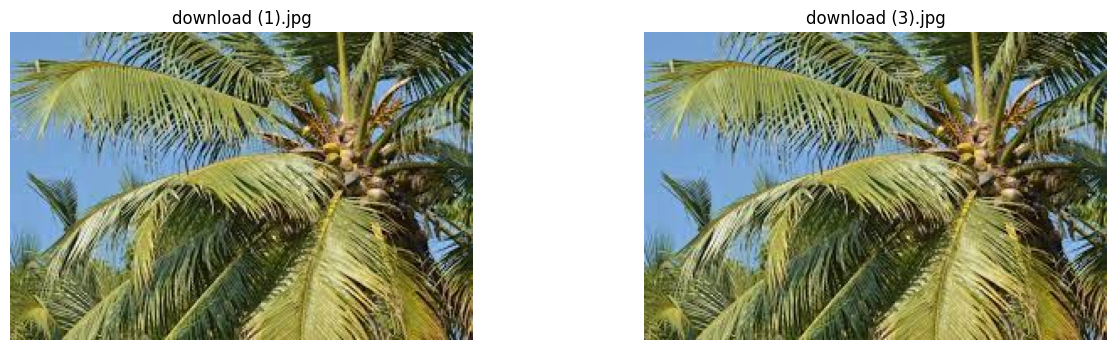

Duplicate set 2:


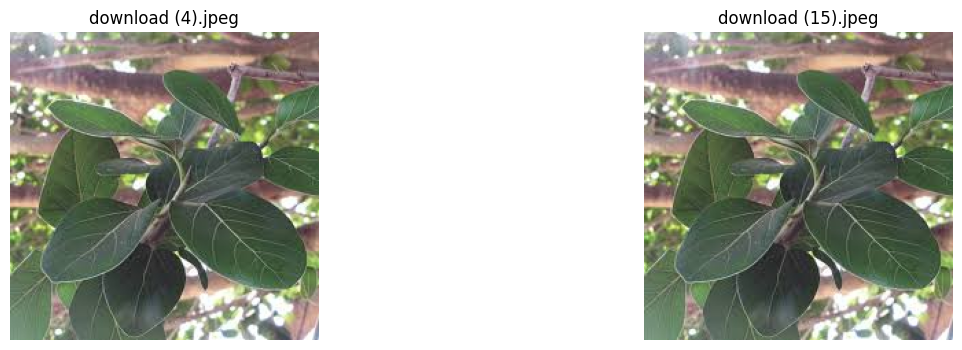

Duplicate set 3:


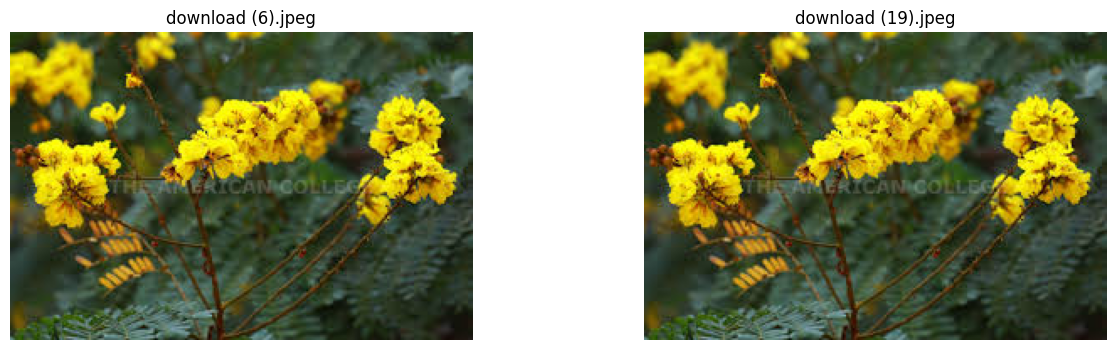

In [21]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [22]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 86 duplicate images.


In [24]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        if os.path.isfile(img_path):  # ✅ Only proceed if it's a file
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)


duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [26]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue
df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


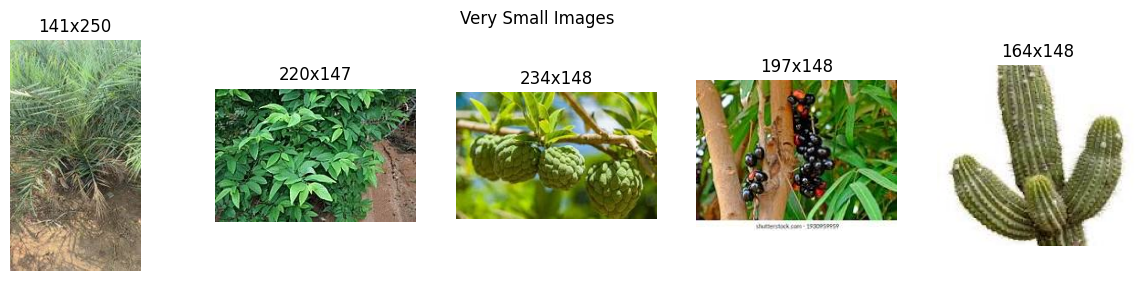

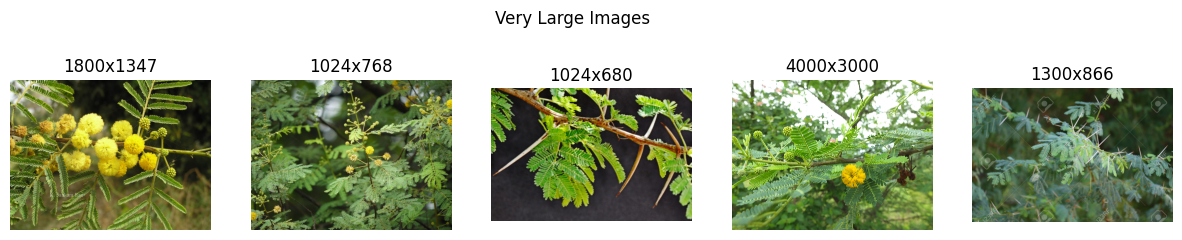

In [27]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [28]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [29]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())


             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [30]:
!pip install tensorflow pillow


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [32]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [33]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.0579 - loss: 3.4980 - val_accuracy: 0.0903 - val_loss: 3.4018
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.0649 - loss: 3.4301 - val_accuracy: 0.0903 - val_loss: 3.3869
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.0759 - loss: 3.4098 - val_accuracy: 0.0903 - val_loss: 3.3857
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.0973 - loss: 3.3863 - val_accuracy: 0.0903 - val_loss: 3.3808
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.0836 - loss: 3.4002 - val_accuracy: 0.0903 - val_loss: 3.3930
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.0858 - loss: 3.3977 - val_accuracy: 0.0903 - val_loss: 3.3761
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.0831 - loss: 3.3893 - val_accuracy: 0.0903 - val_loss: 3.3821
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.0797 - loss: 3.3982 - val_accuracy: 0.0903 - v

In [34]:
# Install any missing packages
!pip install tensorflow keras matplotlib pandas Pillow

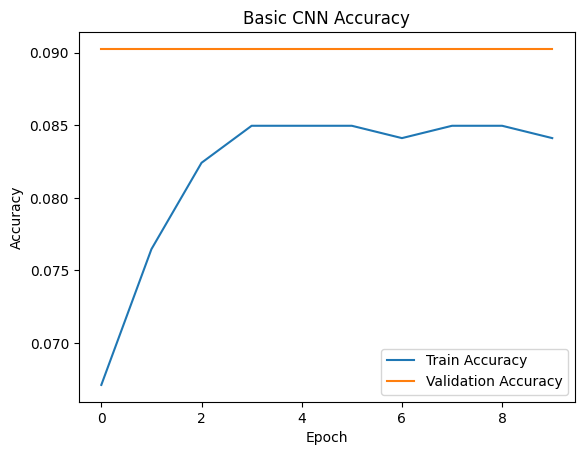

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')  # Dynamically set class count
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_gen, validation_data=val_gen, epochs=25)

model.save("improved_cnn_model.h5")


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 233s 6s/step - accuracy: 0.0719 - loss: 5.1599 - val_accuracy: 0.0361 - val_loss: 6.3875
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 234s 6s/step - accuracy: 0.1050 - loss: 3.2924 - val_accuracy: 0.0325 - val_loss: 10.7058
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 234s 6s/step - accuracy: 0.1171 - loss: 3.1915 - val_accuracy: 0.1155 - val_loss: 10.5048
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 235s 6s/step - accuracy: 0.1428 - loss: 3.0718 - val_accuracy: 0.1191 - val_loss: 10.6897
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 235s 6s/step - accuracy: 0.1479 - loss: 3.1264 - val_accuracy: 0.1083 - val_loss: 10.6574
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 225s 6s/step - accuracy: 0.1838 - loss: 3.0160 - val_accuracy: 0.1011 - val_loss: 12.7771
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 263s 6s/step - accuracy: 0.1903 - loss: 3.0388 - val_accuracy: 0.0975 - val_loss: 12.5170
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step - accuracy: 0.1602 - loss: 3.0616 - val_accuracy: 0.09

In [41]:
from google.colab import files
files.download('improved_cnn_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>